## 1. Importing Libra and other dependencies <a name="import"></a>

Import Libra and other dependencies such as numpy and matplotlib

In [1]:
import os
import sys
import time
import math

# Fisrt, we add the location of the library to test to the PYTHON path
from liblibra_core import *
from libra_py import units
import libra_py.workflows.nbra.lz as lz
import libra_py.workflows.nbra.step4 as step4
from libra_py import data_visualize
from libra_py import data_conv, data_stat, data_outs, data_read
from libra_py import fit
import libra_py.workflows.nbra.decoherence_times as decoherence_times
from libra_py import influence_spectrum

import numpy as np
import h5py
import matplotlib.pyplot as plt

colors = {}
colors.update({"1": '#000000'})  # Black 
colors.update({"2": '#000099'})  # Blue  
colors.update({"3": '#006400'})  # Green 
colors.update({"4": '#990000'})  # Red   
colors.update({"5": '#8B008B'})  # Purple
colors.update({"6": '#FF8C00'})  # Orange
colors.update({"9": '#4d4d4d'})  # Gray  
color_index = ["1","2","3","4","5","6","9"]


colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24",
              "11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24",
              "11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"  ]


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::v

## 2. Read the results of the NBRA NAMD calculations<a name="setup"></a>
[Return to Table of contents](#toc)

The NBRA NAMD is run using the function step4.run(). We pass the vibronic Hamiltonian and the parameters dictionary to the function. The function returns a list with the NAMD data for all time-steps and all states. The list takes the following form:

res = MATRIX(nsteps, 3*nstates+4): the trajectory (and initial-condition)-averaged observables, the assumed format is: 

Any given row of the res matrix takes the following form:

First state info        ...  N-st state info All-states-related data  
E(0), P_SE(0), P_SH(0), ...,   E(nst-1), P_SE(nst-1), P_SH(nst-1), <E*P_SE>, <E*P_SH>, sum{P_SE}, sum{P_SH}

Now, we will plot the results. First, we must extract the data from the res list of lists. Recall that res (herein called res_istate_lumo_p_3) is of type MATRIX. That is, it is a custom Libra data type called MATRIX. Now, the index of the lumo state here is 6 from 9. The first column is for the time. The next three columns are E(0), P_SE(0), P_SH(0), where 0 is for the first state included in the active state. Therefore, the surface hopping populations as a function of time for the 0th state in the active space is index 3 from 0. Thus, the surface hopping populations as a function of time for the 1st state in the active space is index 6 from 0. Given that the lumo KS orbital is the 1st state in our active space (recall above), we extract it at each step via using .get(t,6), as shown below.
<a name="unpack2_toc"></a>
<a name="plot_nparrays_toc"></a>

In [2]:
!tar -xf namd_res.tar.bz2

======= Running initial state 1 =======
    *** Running decoherence method 0 ( FSSH ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.388673457200127e-08  1/B =  41864240.46307885
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.019916390221022e-08  1/B =  49506999.63826615
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.291400151574379e-08  1/B =  43641439.026392594
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.4980056978348816e-08  1/B =  40031934.30930677
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.2844024782685363e-08  1/B =  43775123.2330106
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.019916390221022e-08  1/B =  49506999.63826615
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.4489001333447512e-08  1/B =  40834658.23631535
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.3549430060739915e-08  1/

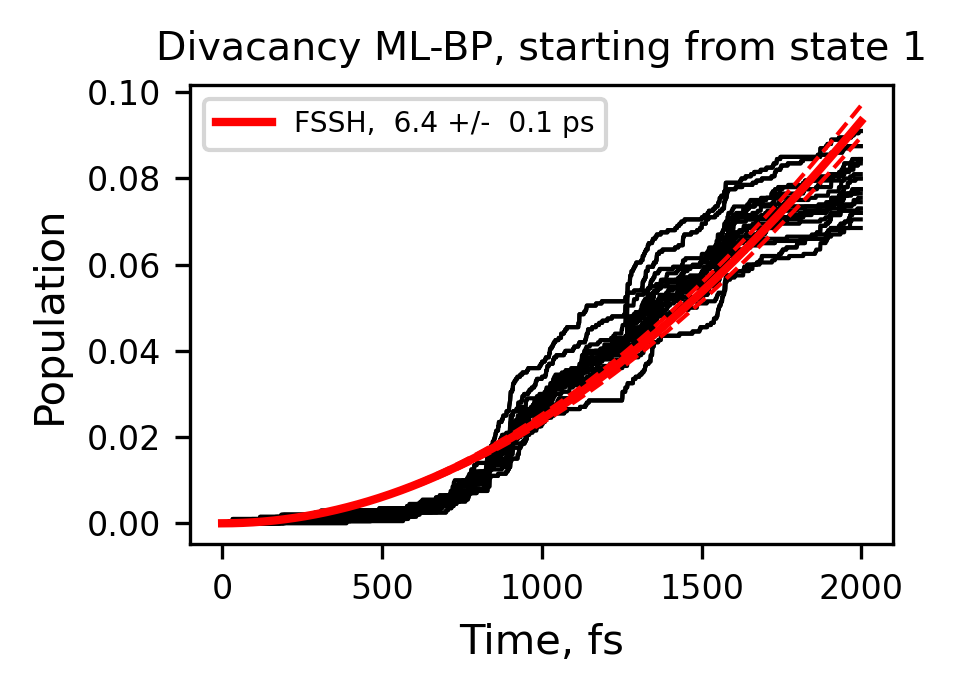

    *** Running decoherence method 1 ( IDA ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.372970205955157e-06  1/B =  296474.60218724946
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.372970205955157e-06  1/B =  296474.60218724946
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.5125064766526915e-06  1/B =  661154.1936753137
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.194408930717675e-06  1/B =  313046.9585105167
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.982192129273249e-06  1/B =  251117.969082647
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.5125064766526915e-06  1/B =  661154.1936753137
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.5125064766526915e-06  1/B =  661154.1936753137
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.445276377653154e-06  1/B =  224957.89126343178
raw data lengths:

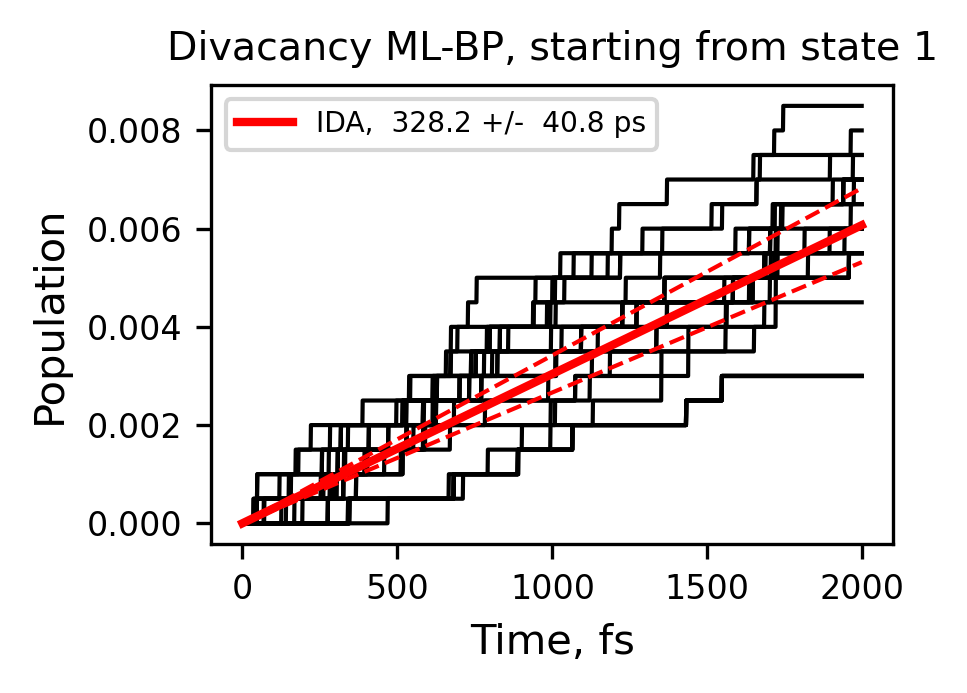

    *** Running decoherence method 2 ( mSDM ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.641334707087981e-06  1/B =  378596.4714416978
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.971387999479493e-07  1/B =  1002869.4100081153
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.9333968452001296e-06  1/B =  517224.3879897756
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.6595081242883554e-06  1/B =  376009.3796545875
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.51431025467696e-06  1/B =  397723.3907946975
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.827162076779013e-06  1/B =  353711.5923468033
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  7.126550333349307e-07  1/B =  1403203.447985786
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.380148330562007e-06  1/B =  420141.8824027145
raw data lengths: 1

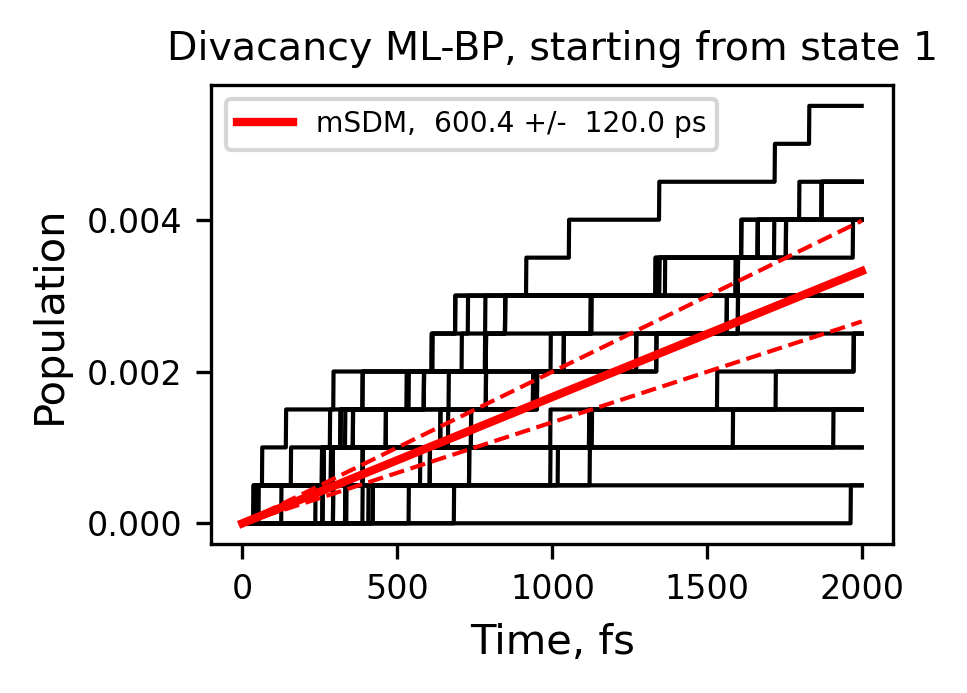

    *** Running decoherence method 21 ( mSDM2 ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.631964063969674e-06  1/B =  612758.590754473
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.333114141444548e-06  1/B =  300019.72856729326
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.051812498970092e-06  1/B =  950739.7953334596
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.4700810699271637e-06  1/B =  404845.011839829
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.117174221871787e-06  1/B =  895115.5338372688
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.675563160538626e-07  1/B =  1033531.571659268
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.3541179778081926e-06  1/B =  738488.0906895746
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.7702659837861226e-06  1/B =  564886.863984851
raw data lengths: 

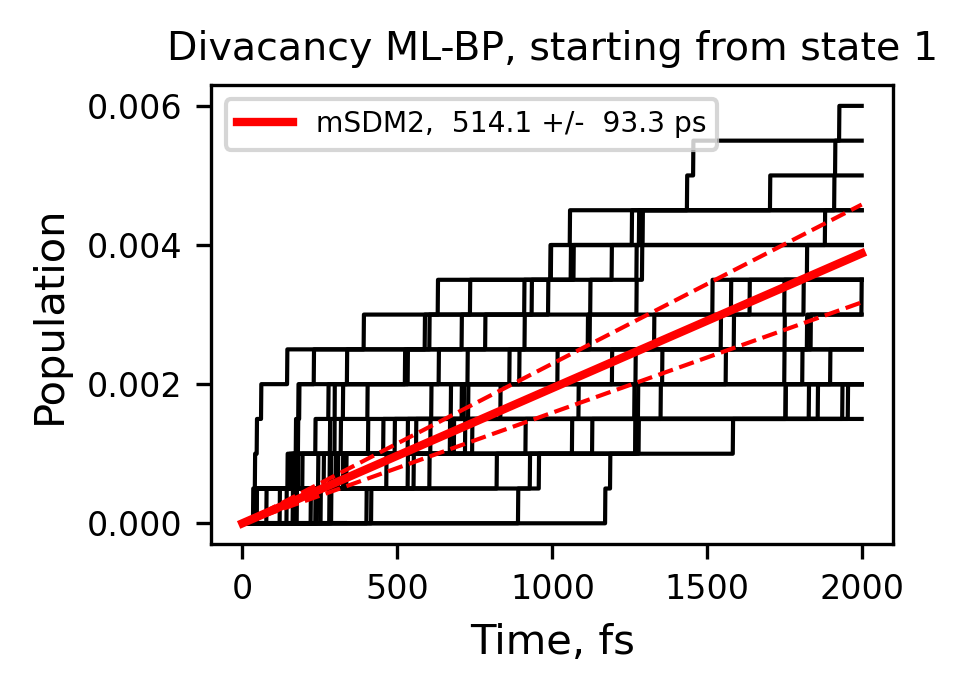

    *** Running decoherence method 3 ( DISH ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.8382729060393013e-07  1/B =  3523269.3722728053
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.162337801356187e-07  1/B =  1937106.8660739171
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.034895026302401e-06  1/B =  491425.8411732892
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.710785634895036e-07  1/B =  1490138.4940686473
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.085783278090903e-07  1/B =  1236738.5639800443
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.639305953053116e-07  1/B =  1773267.8601319739
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.034895026302401e-06  1/B =  491425.8411732892
raw data lengths: 1246 1246
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.8759306357199174e-06  1/B =  5330

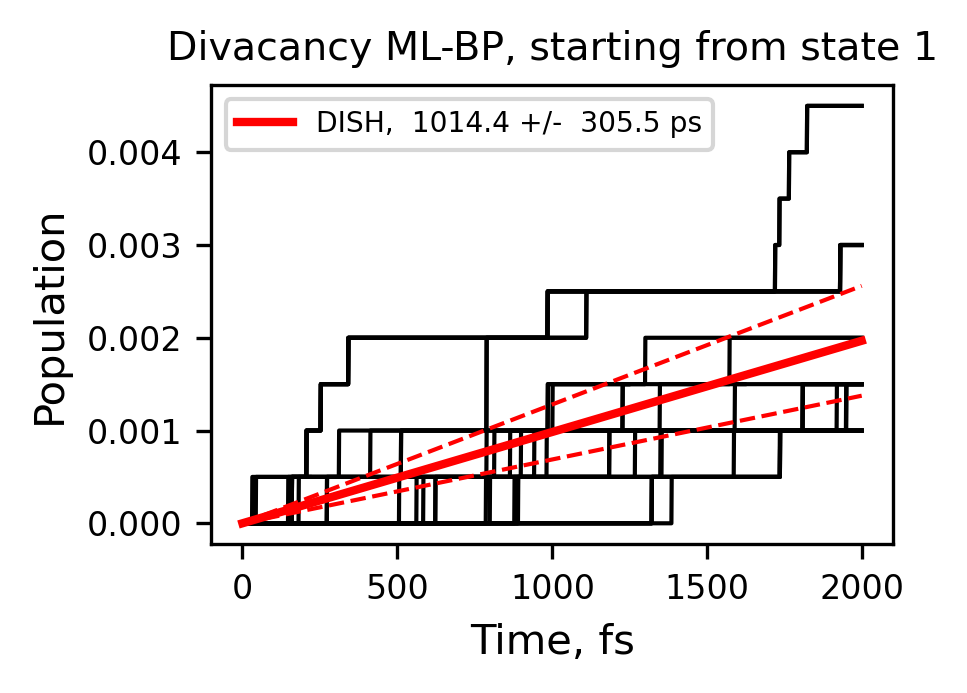

    *** Running decoherence method 31 ( DISH2 ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.8423425592665846e-06  1/B =  542787.2221537826
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.49185863069955e-07  1/B =  4013068.7498883745
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.936555173339671e-07  1/B =  2025704.0889578094
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.12431203222233e-07  1/B =  1632836.4634894833
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  7.236218255662585e-07  1/B =  1381937.3112709338
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.862798310320091e-07  1/B =  1013911.0306591534
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.0495863631150235e-06  1/B =  952756.2810859525
raw data lengths: 58 58
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.8938512849558772e-06  1/B =  528024.

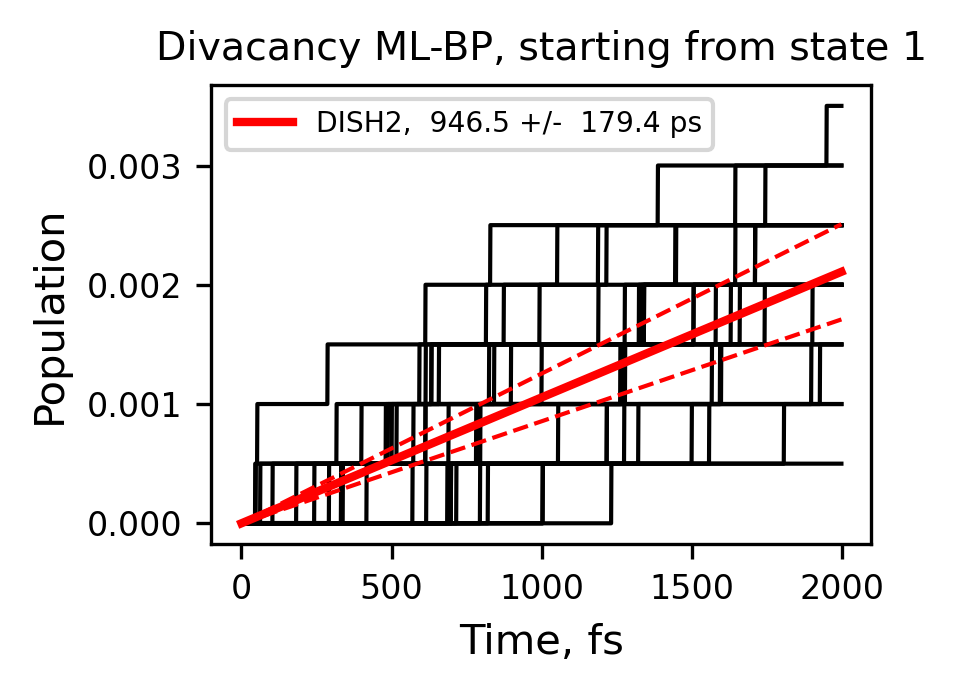

======= Running initial state 2 =======
    *** Running decoherence method 0 ( FSSH ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.5797652439293074e-08  1/B =  17921900.945348617
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.195888547489444e-08  1/B =  19245986.338240094
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.90104684961973e-08  1/B =  20403804.139876556
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.3079279774079245e-08  1/B =  18839743.196522053
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.278909627315659e-08  1/B =  18943305.921084747
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.9877816603408927e-08  1/B =  20048993.08145847
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.957794708069821e-08  1/B =  20170258.328209843
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.1289812901972984e-0

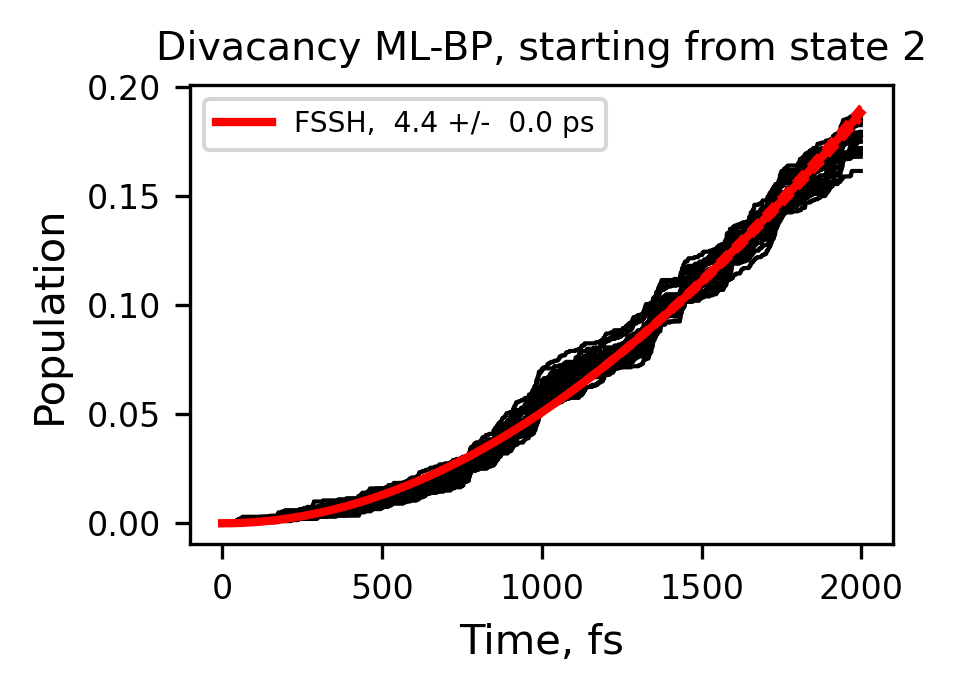

    *** Running decoherence method 1 ( IDA ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.442703853911638e-06  1/B =  225088.1519189123
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.8788493303942158e-06  1/B =  347361.0061638984
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.8788493303942158e-06  1/B =  347361.0061638984
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.31497925719446e-06  1/B =  431969.31328529795
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.2859225740377055e-06  1/B =  233321.9937423915
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.345362983502363e-06  1/B =  298921.22467173036
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.3912764125183324e-06  1/B =  418186.7034546905
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.8939876855650623e-06  1/B =  345543.9720728273
raw data lengths

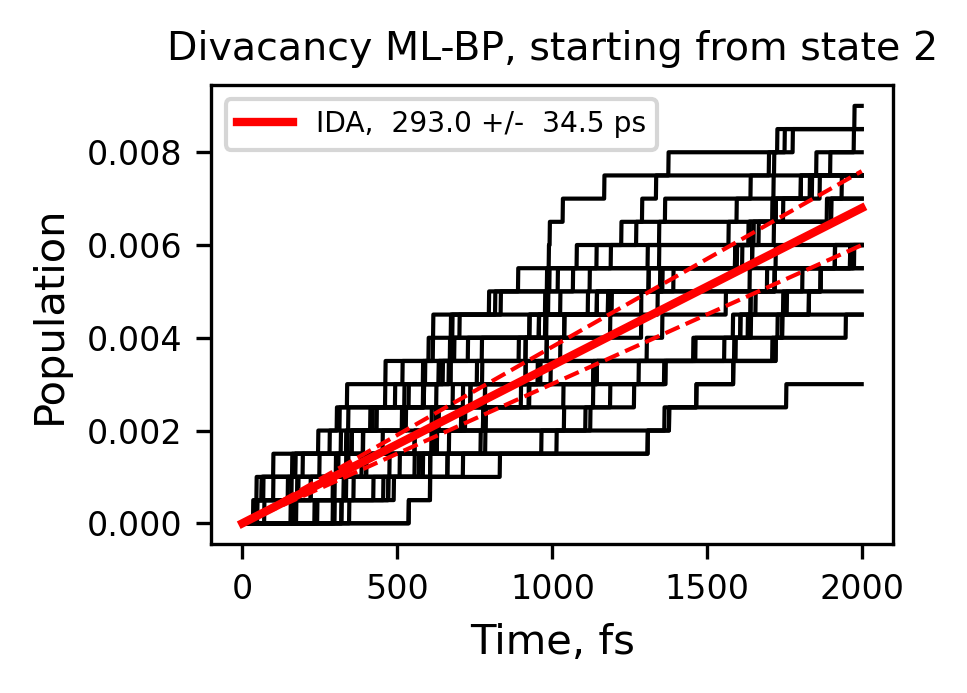

    *** Running decoherence method 2 ( mSDM ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.876850738365533e-06  1/B =  347602.3231459497
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.6268708985812447e-06  1/B =  614676.9241936015
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.2847931902863367e-06  1/B =  437676.37449701835
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.480697755666642e-07  1/B =  1179148.259742919
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.5001494445869206e-06  1/B =  666600.2534669864
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.1965484942398898e-07  1/B =  4552596.961197743
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.645878268371196e-07  1/B =  1036712.233119297
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  7.244751152871676e-07  1/B =  1380309.6599165036
raw data length

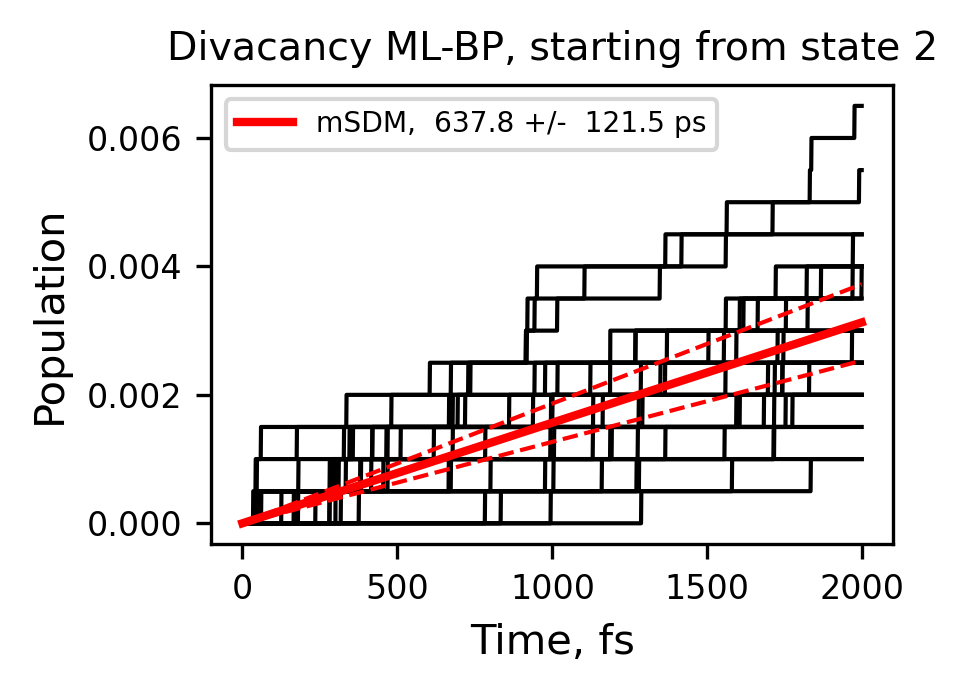

    *** Running decoherence method 21 ( mSDM2 ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.758694816957111e-07  1/B =  1479575.6090230132
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.213517900729212e-07  1/B =  1217505.1081476526
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.7967801590824091e-06  1/B =  556551.1144728392
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.2360103404146216e-06  1/B =  309022.49832485785
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.856682821295733e-06  1/B =  350056.363466498
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.8397497887345837e-06  1/B =  352143.70081724995
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.9430261311680804e-06  1/B =  514661.1175006866
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.2356158083763194e-06  1/B =  447304.0476155332
raw data le

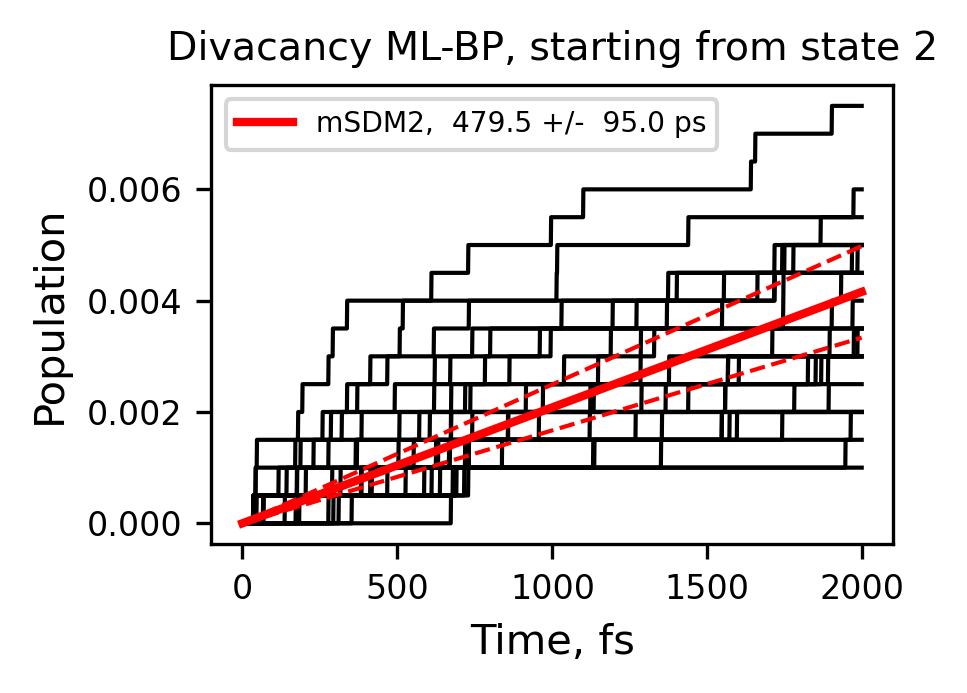

    *** Running decoherence method 3 ( DISH ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.177751590864526e-07  1/B =  2393632.0249071205
raw data lengths: 53 53
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.7756057981567697e-07  1/B =  5631880.685668437
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  7.42691608930899e-07  1/B =  1346453.8820352303
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.7756057981567697e-07  1/B =  5631880.685668437
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.3343064133200175e-06  1/B =  749453.0416831339
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.263684637520933e-06  1/B =  791336.6755504574
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.2984061741727452e-06  1/B =  435084.1079514266
raw data lengths: 1986 1986
Fitting parameters : A =  1.0  and B =  9.221261535047617e-07  1/B =  1084450.31

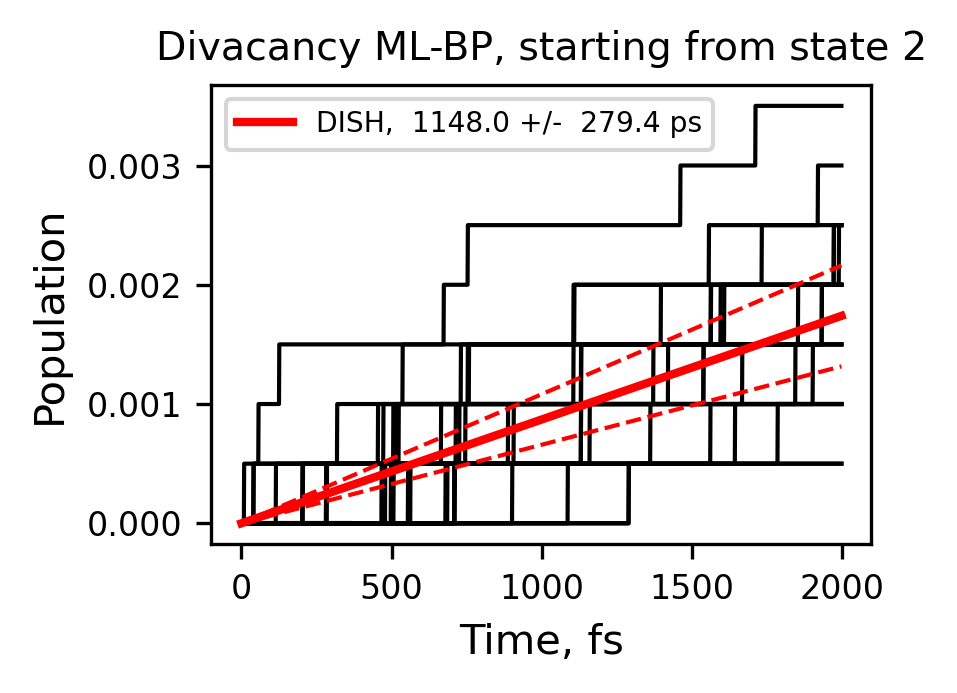

    *** Running decoherence method 31 ( DISH2 ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.3630761505176665e-06  1/B =  733634.7273189556
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.1400684006259404e-06  1/B =  877140.3535533152
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.981742392972608e-07  1/B =  1001829.1002020094
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.87205271665543e-07  1/B =  2052522.9470145812
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.4464979000225923e-07  1/B =  2248960.9181979354
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.87205271665543e-07  1/B =  2052522.9470145812
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.086075903195439e-06  1/B =  920745.9598890026
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.2866208716783132e-06  1/B =  777229.7356684142
raw data leng

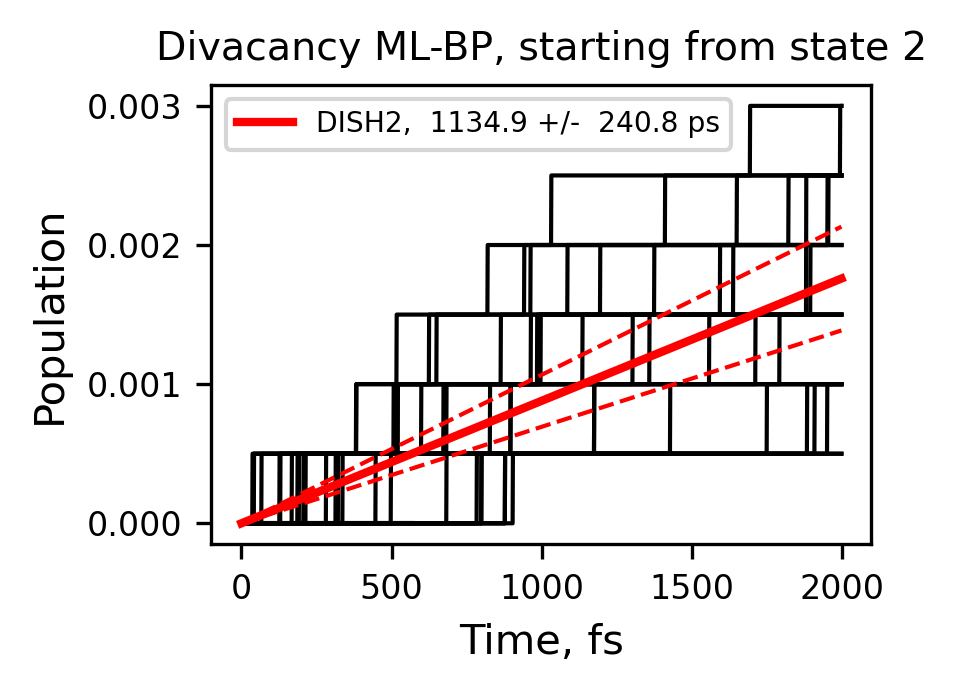

In [2]:
plt.rc('axes', titlesize=12)      # fontsize of the axes title
plt.rc('axes', labelsize=12)      # fontsize of the x and y labels
plt.rc('legend', fontsize=10)     # legend fontsize
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)


methods = {0:"FSSH", 1:"IDA", 2:"mSDM", 21:"mSDM2", 3:"DISH", 31:"DISH2"}

init_states = [1, 2]
tsh_methods = [0, 1, 2, 21, 3, 31]
batches = list(range(25))

prefix = "namd_res"
all_time = np.array( list(range(1999) ) ) #* units.au2fs

for istate in init_states:  # initial states       
    print(F"======= Running initial state {istate} =======")
    for method in tsh_methods:  # decoherence method: FSSH, IDA, mSDM, DISH                        
        name = methods[method]
        print(F"    *** Running decoherence method {method} ( {name} ) *** ")
        
        figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=300, edgecolor='black', frameon=True)        
        name = methods[method]        
                
        tau, tau2 = [], []
        rat, rat2 = [], []
        for batch in batches:        
                        
            infile1 = F"{prefix}/start_s{istate}_{name}_batch{batch}/time.txt"
            infile2 = F"{prefix}/start_s{istate}_{name}_batch{batch}/SH_pop.txt"
                                    
            # Plot the raw data
            t = np.array(data_read.get_data_from_file2(infile1, [0])[0]) * units.au2fs
            p = np.array(data_read.get_data_from_file2(infile2, [0,1,2,3]))
            
            print(F"raw data lengths: { len(t)} { len(p[0]) }")
                        
            if batch==0:
                plt.plot(t, p[0], color="black", label="", linewidth=1)      
                #plt.plot(t, p[1], color="red", label="P1", linewidth=1)      
                #plt.plot(t, p[2], color="blue", label="P2", linewidth=1)      
                #plt.plot(t, p[3], color="green", label="P3", linewidth=1)      
            else:
                plt.plot(t, p[0], color="black", label="", linewidth=1)      
                #plt.plot(t, p[0], color=colors[ clrs_index[batch] ], label="", linewidth=1)
                
                #plt.plot(t, p[1], color="red", label="", linewidth=1)      
                #plt.plot(t, p[2], color="blue", label="", linewidth=1)      
                #plt.plot(t, p[3], color="green", label="", linewidth=1)      
            
                        
            
            T = []
            P = []
            for ia, a in enumerate(p[0]):
                T.append(t[ia])
                P.append(p[0, ia])
                                                
            if sum(P) > 0.01 and len(p[0]) > 1500:
                
                # Use a well-behaved subset of data for fitting                        
                pop = 1.0 - np.array(P)
            
                # Do the fitting and collect the results
                verb, opt = 0, 0
                
                fit_res, fit_a, fit_b = None, None, None
                if istate in [1, 2] and method in [0]:
                    fit_res, fit_a, fit_b = fit.fit_gau(T, pop, 0.0, verb, opt)  
                    r = fit_b                    
                    rat2.append( r )            # 1/tau^2
                    rat.append( math.sqrt(r) )  # 1/tau                                         
                    tau2.append( 1.0/r )           # tau^2
                    tau.append(1.0/math.sqrt(r) )  # tau                    
                    
                else:
                    fit_res, fit_a, fit_b = fit.fit_exp(T, pop, 0.0, verb, opt)                  
                    r = fit_b                                        
                    rat2.append(r**2)            # 1/tau^2
                    rat.append( r )              # 1/tau                                        
                    tau2.append( 1.0/(r**2) )    # tau^2
                    tau.append(1.0/r )           # tau
                                                                                                
                print( "Fitting parameters : A = ", fit_a, " and B = ", fit_b, " 1/B = ", 1/fit_b)                                                
            else:
                pass
        
        n = len(rat)
        
        if n > 0:
            print(F"Number of samples = {n}")
            
            # Prefactor for 95% confidence interval
            # The error bars reporting is :  average +/-  prefactor * standard_deviation
            prefactor = 1.96/math.sqrt(n)
            
            # Statistical analysis of the obtained timescales
            rat_stat = DATA(rat); rat_stat.Calculate_Estimators()
            rat2_stat = DATA(rat2); rat2_stat.Calculate_Estimators()            
            tau_stat = DATA(tau); tau_stat.Calculate_Estimators()
            tau2_stat = DATA(tau2); tau2_stat.Calculate_Estimators()            
            
            
            print(F"Lifetime from averaging individual lifetimes {tau_stat.ave} +/- { prefactor * tau_stat.sd }")
            print(F"Average rates  {rat_stat.ave} +/- { prefactor * rat_stat.sd }")  
                                                
            
            # Plot the average fitting     
            Y, Y1, Y2 = None, None, None
            TAU, ERR = None, None
            if istate in [1, 2] and method in [0]:   
                """
                tau = <r2> ^ {-1/2}
                d tau = - 1/2 <r2>^ {-3/2} * d( r2)
                """
                
                TAU = 1.0/math.sqrt(rat2_stat.ave)
                ERR = prefactor * 0.5 * TAU**3 * rat2_stat.sd # tau_stat.sd #( tau_stat.ave / rat_stat.ave) *rat_stat.sd
                                
                
                print(F"Lifetime { TAU } +/- { ERR }")    
                Y = 1.0 - np.exp(-(all_time**2 * (rat2_stat.ave) )  )
                Y1 = 1.0 - np.exp(-(all_time**2 * (rat2_stat.ave - prefactor * rat2_stat.sd) )  )
                Y2 = 1.0 - np.exp(-(all_time**2 * (rat2_stat.ave + prefactor * rat2_stat.sd) )  ) 
                
                                                            
            else:   
                """
                tau = <r> ^ {-1}
                d tau = - <r>^ {-2} * d(r)
                """
                
                TAU = 1.0/rat_stat.ave
                ERR = prefactor * TAU**2 * rat_stat.sd 
                
                print(F"Lifetime {TAU} +/- { ERR }")
                Y = 1.0 - np.exp(-(all_time * rat_stat.ave ) ) 
                Y1 = 1.0 - np.exp(-(all_time * (rat_stat.ave - prefactor * rat_stat.sd ) )  )
                Y2 = 1.0 - np.exp(-(all_time * (rat_stat.ave + prefactor * rat_stat.sd) )  )                                
                                        
                    
            plt.plot(all_time , Y, color="red", 
                     label=F"{name}, {TAU/1000.0 : 3.1f} +/- {ERR/1000.0 : 3.1f} ps", 
                     linewidth=2 )
            plt.plot(all_time, Y1, color="red", label=F"", linewidth=1, linestyle='dashed' )
            plt.plot(all_time, Y2, color="red", label=F"", linewidth=1, linestyle='dashed' )
            
                            
                    
        plt.title(F"Divacancy ML-BP, starting from state {istate}",fontsize=9.5)
        plt.legend(fontsize=6.75, ncol=1, loc='upper left')
        plt.xlabel('Time, fs',fontsize=10)
        plt.ylabel('Population',fontsize=10)
        plt.tight_layout()
        plt.savefig(F'{prefix}/start_s{istate}_{name}.png', dpi=300)
        plt.show()